In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [10]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df.drop("Loan_ID",axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df["Dependents"]=df["Dependents"].replace("3+",np.nan)
df["Dependents"]=df["Dependents"].replace(np.nan,3)
df["Dependents"].value_counts()

0    345
1    102
2    101
3     66
Name: Dependents, dtype: int64

In [13]:
mode1=df["Gender"].mode().values[0]
df["Gender"]=df["Gender"].replace(np.nan,mode1)
df.isnull().sum()

Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
mode2=df["Married"].mode().values[0]
df["Married"]=df["Married"].replace(np.nan,mode2)
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
mode3=df["Self_Employed"].mode().values[0]
df["Self_Employed"]=df["Self_Employed"].replace(np.nan,mode3)
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
mode4=df["LoanAmount"].mode().values[0]
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,mode4)
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
mode5=df["Loan_Amount_Term"].mode().values[0]
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.nan,mode5)
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
mode6=df["Credit_History"].mode().values[0]
df["Credit_History"]=df["Credit_History"].replace(np.nan,mode6)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

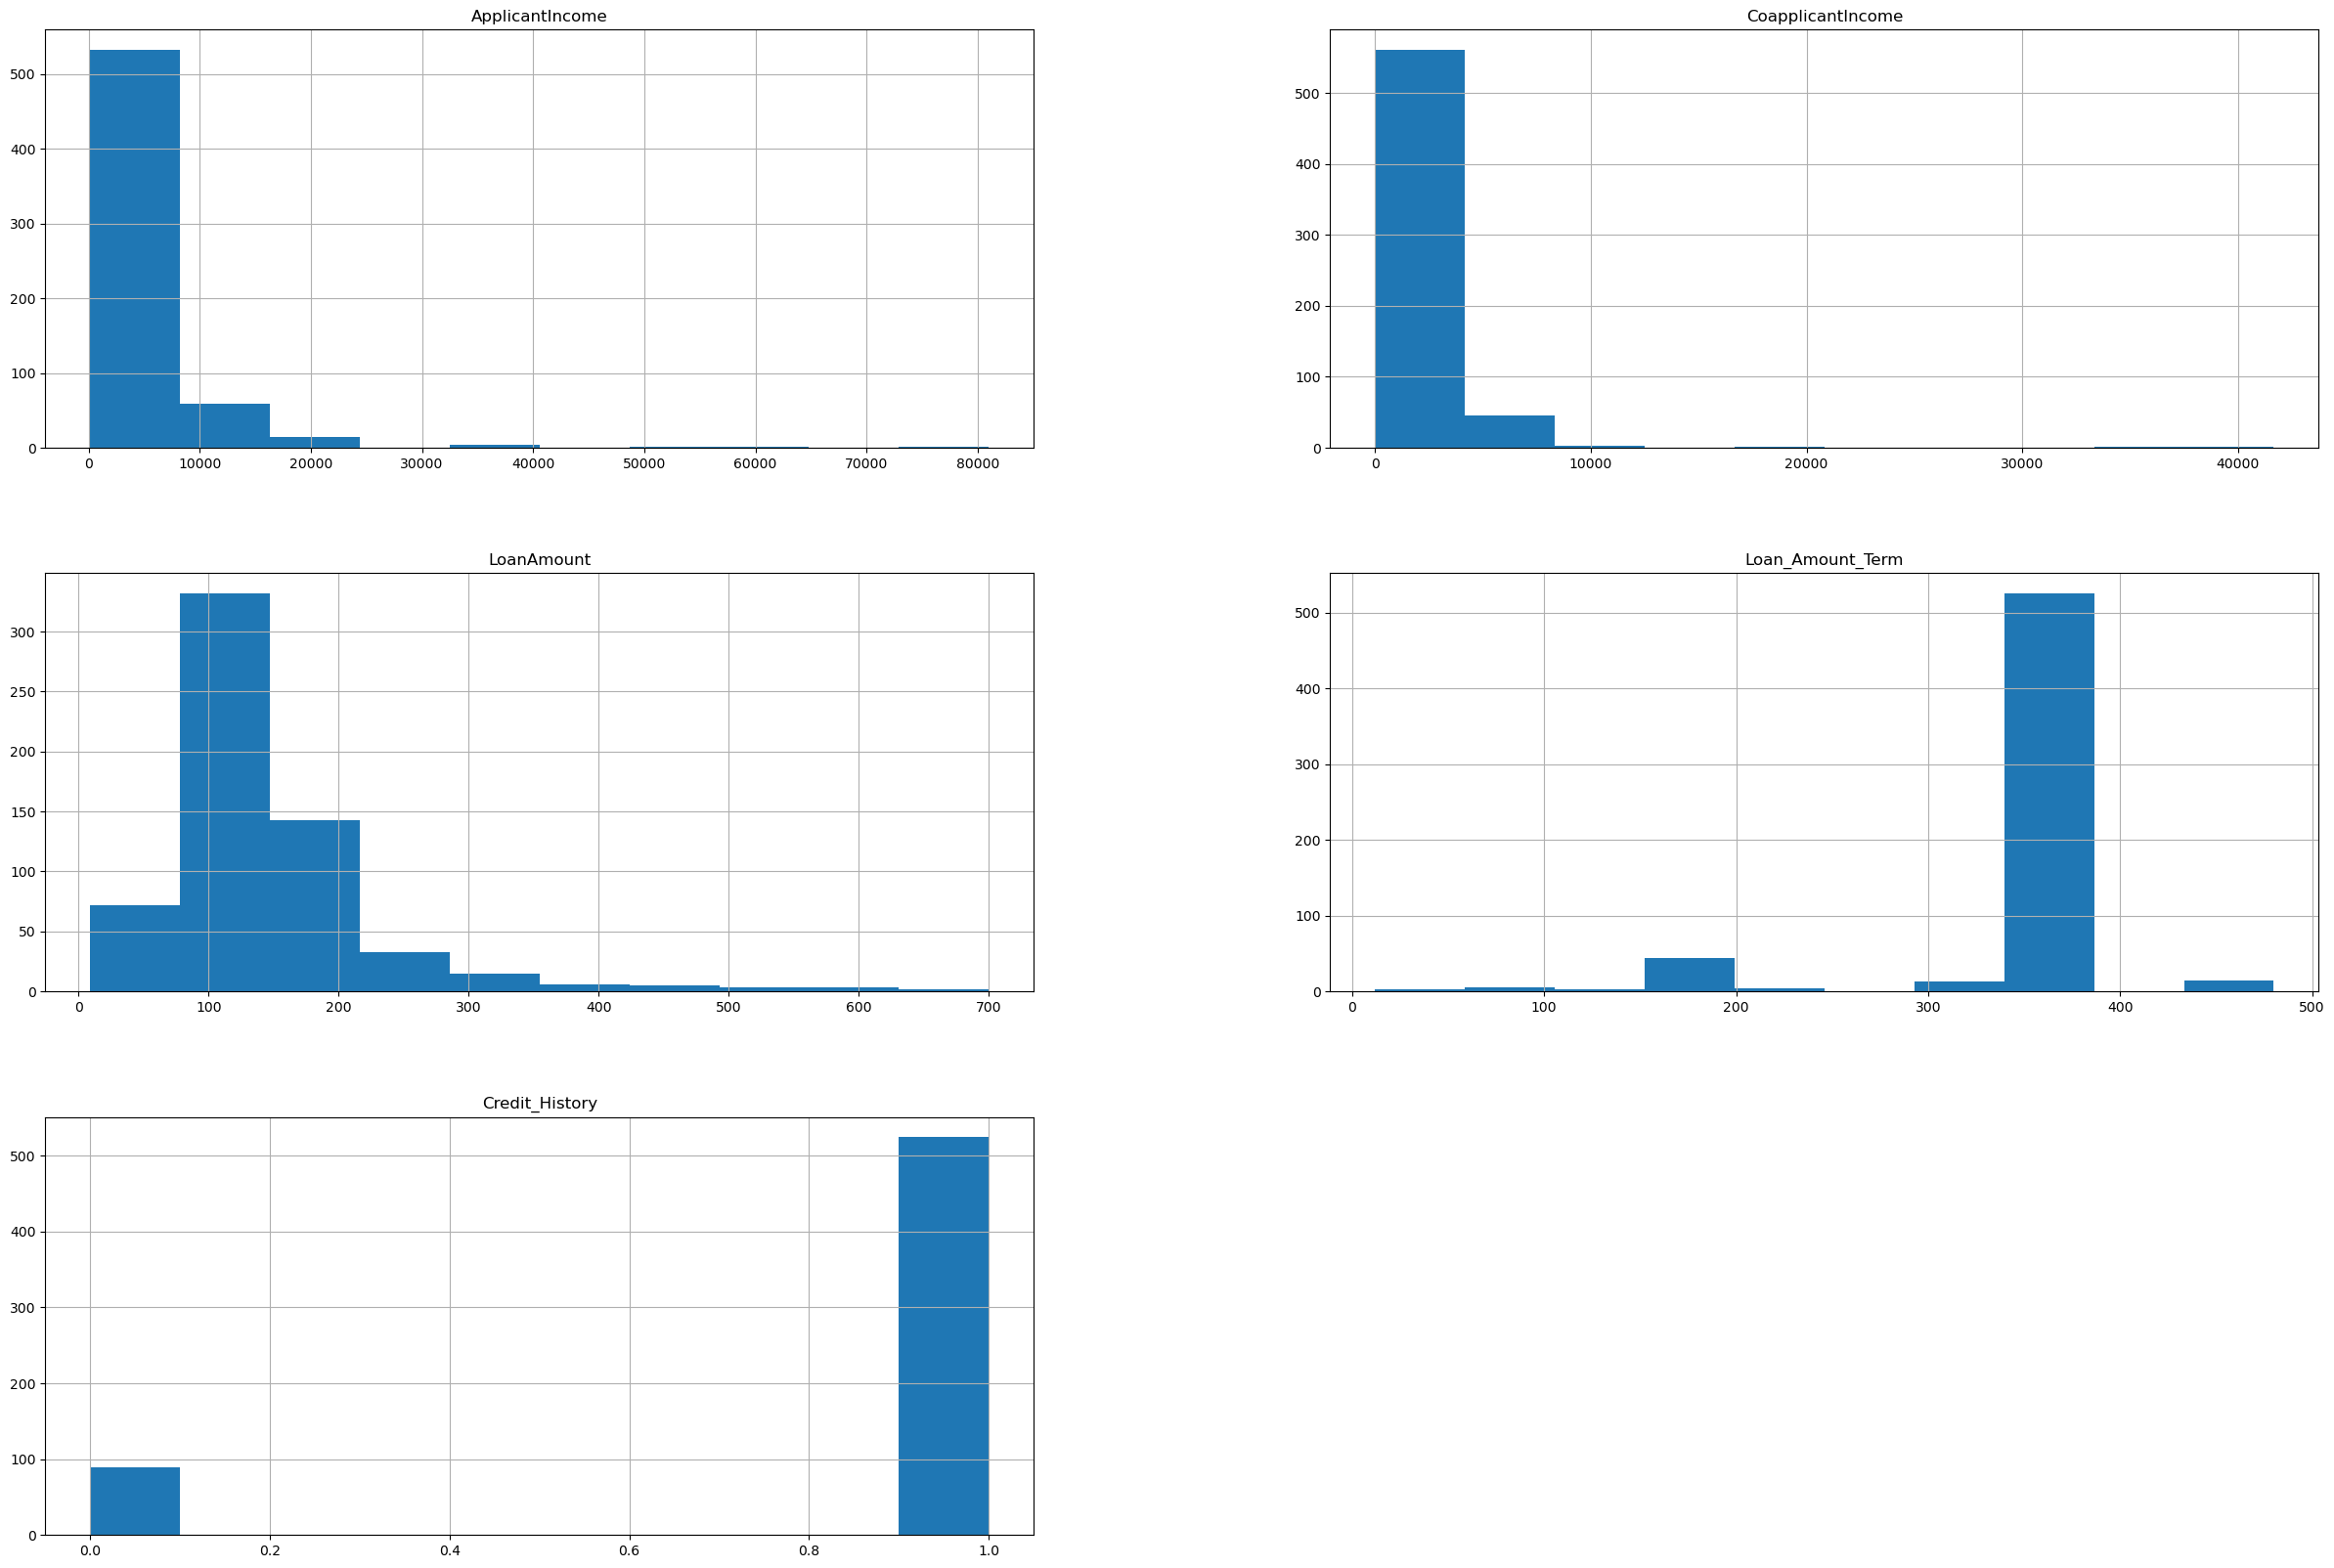

In [19]:
df.hist(figsize=(30,20))

In [20]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: xlabel='ApplicantIncome', ylabel='Married'>

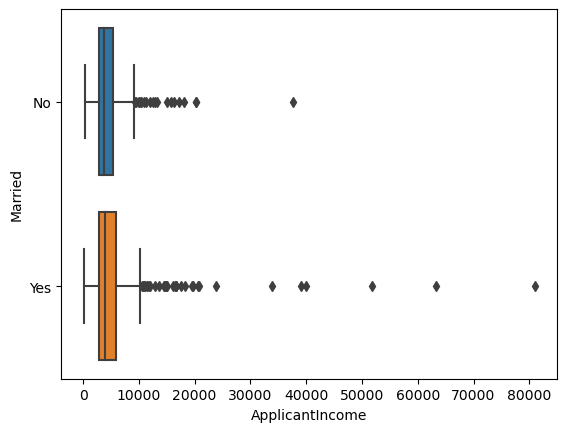

In [21]:
sns.boxplot(x="ApplicantIncome", y="Married", data=df)

In [22]:
pd.crosstab(df['Dependents'],df['Gender'] )

Gender,Female,Male
Dependents,,
3,6,60
0,80,265
1,19,83
2,7,94


<Axes: xlabel='Dependents', ylabel='count'>

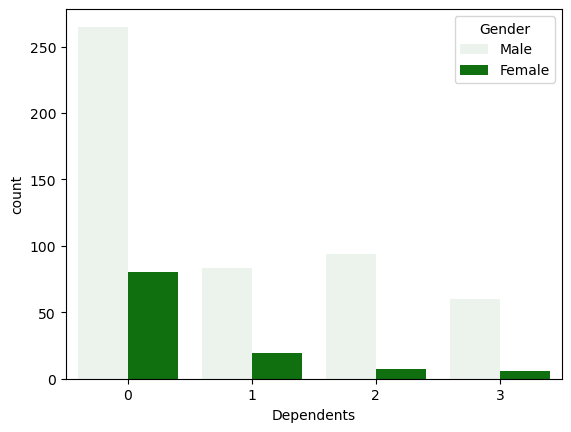

In [23]:
sns.countplot(x="Dependents", hue="Gender",color="green",data=df)

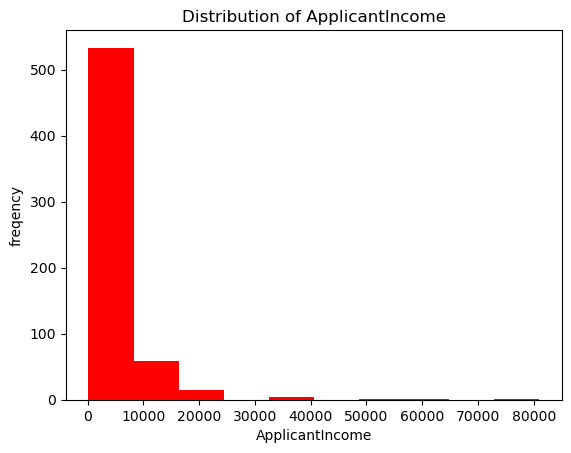

In [24]:
plt.hist(x=df["ApplicantIncome"],color="red")
plt.title("Distribution of ApplicantIncome")
plt.xlabel("ApplicantIncome")
plt.ylabel("freqency")
plt.show()

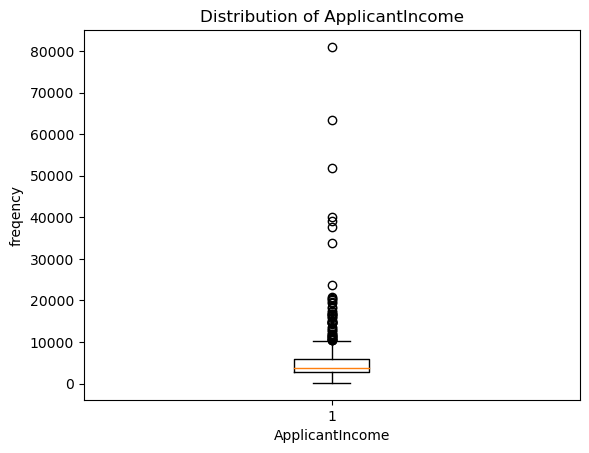

In [25]:
plt.boxplot(x=df["ApplicantIncome"])
plt.title("Distribution of ApplicantIncome")
plt.xlabel("ApplicantIncome")
plt.ylabel("freqency")
plt.show()

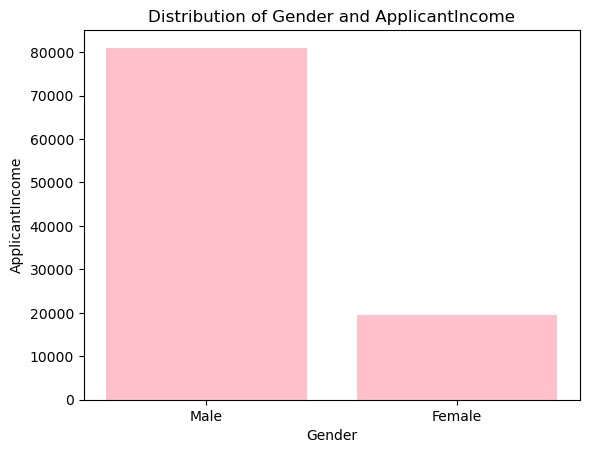

In [26]:
plt.bar("Gender","ApplicantIncome",data=df,color="pink")
plt.title("Distribution of Gender and ApplicantIncome")
plt.xlabel("Gender")
plt.ylabel("ApplicantIncome")
plt.show()

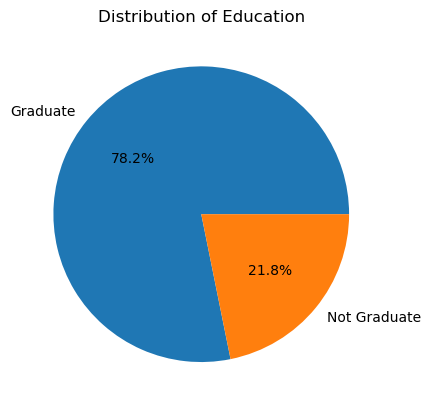

In [27]:
data1=df["Education"].value_counts()
keys=data1.keys().to_list()
counts=data1.to_list()
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
plt.title("Distribution of Education")
plt.show()

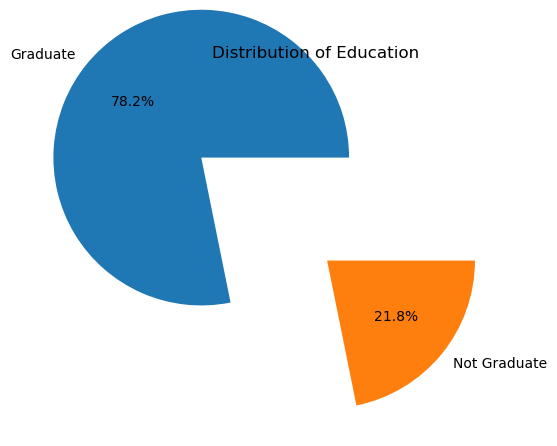

In [28]:
data1=df["Education"].value_counts()
keys=data1.keys().to_list()
counts=data1.to_list()
explore=(1,0.1)
plt.pie(x=counts,labels=keys,autopct="%1.1f%%",explode=explore)
plt.title("Distribution of Education")
plt.show()

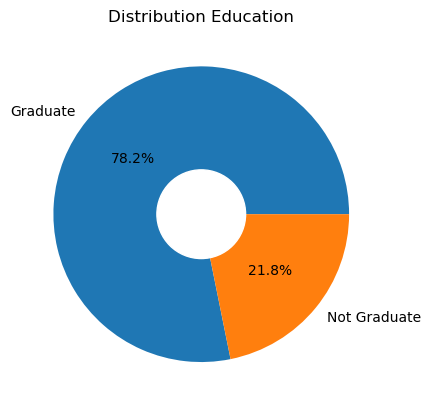

In [29]:
data1=df["Education"].value_counts()
keys=data1.keys().to_list()
counts=data1.to_list()
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.3,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Distribution Education")
plt.show()

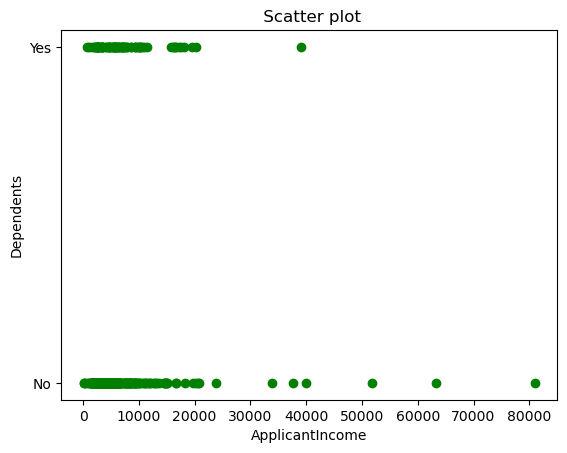

In [30]:
plt.scatter(x='ApplicantIncome',y='Self_Employed',data=df,color="green")
plt.title(" Scatter plot")
plt.xlabel("ApplicantIncome")
plt.ylabel("Dependents")
plt.show()

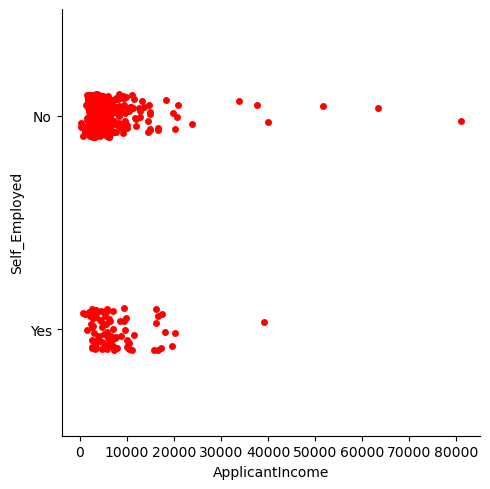

In [31]:
sns.catplot(x="ApplicantIncome", y="Self_Employed", data=df,color="red")

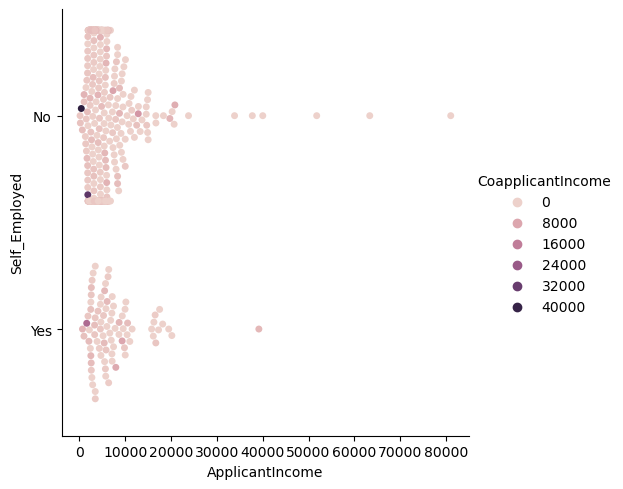

In [32]:
sns.catplot(x="ApplicantIncome", y="Self_Employed",hue="CoapplicantIncome",kind="swarm",data=df)

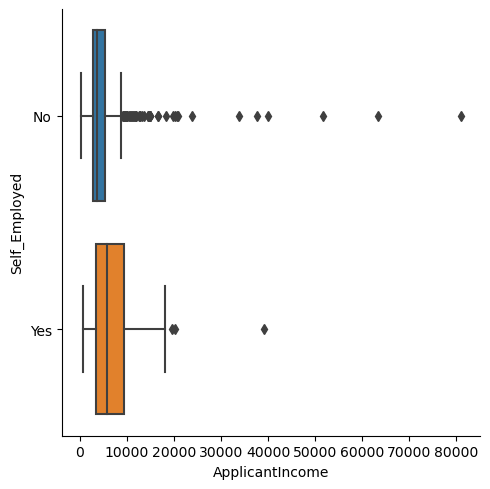

In [33]:
sns.catplot(x="ApplicantIncome", y="Self_Employed",kind="box",data=df)

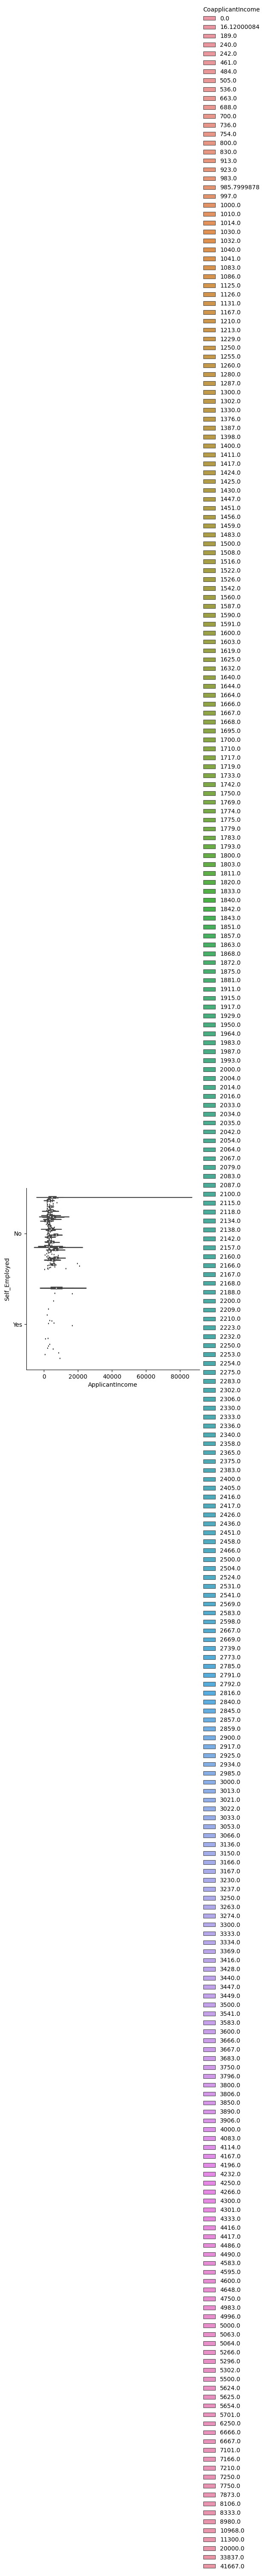

In [34]:
sns.catplot(x="ApplicantIncome", y="Self_Employed",hue="CoapplicantIncome",kind="violin",data=df)

<Axes: xlabel='ApplicantIncome'>

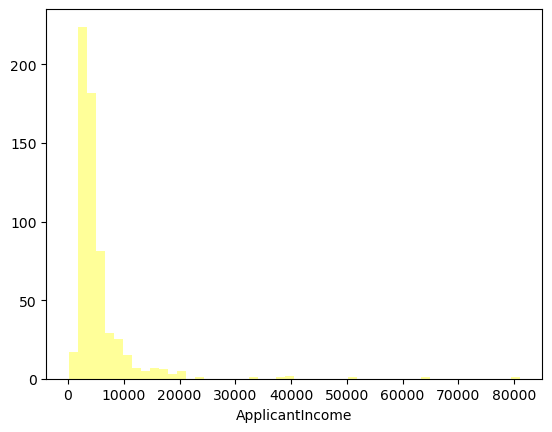

In [35]:
sns.distplot(df.ApplicantIncome, kde=False, rug = False,color="yellow")

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

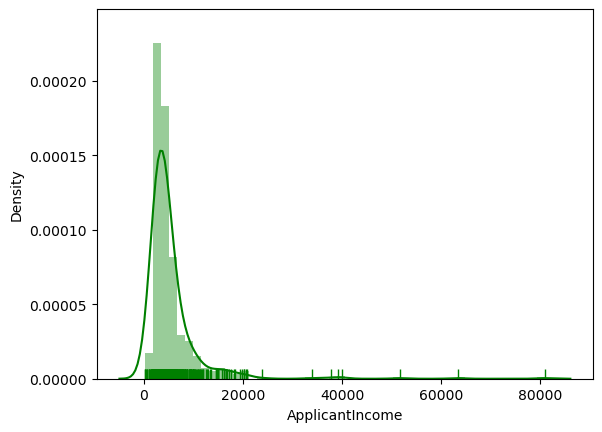

In [36]:
sns.distplot(df.ApplicantIncome, kde=True, rug = True,color="green")

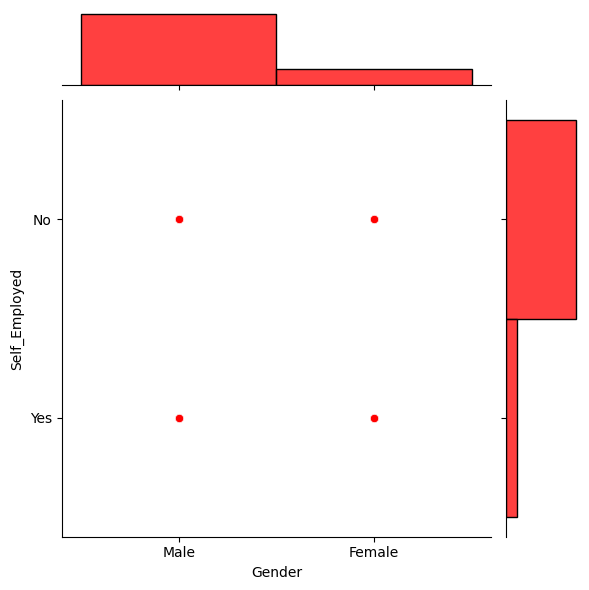

In [37]:
sns.jointplot(x=df.Gender, y=df.Self_Employed,data = df,color="red")

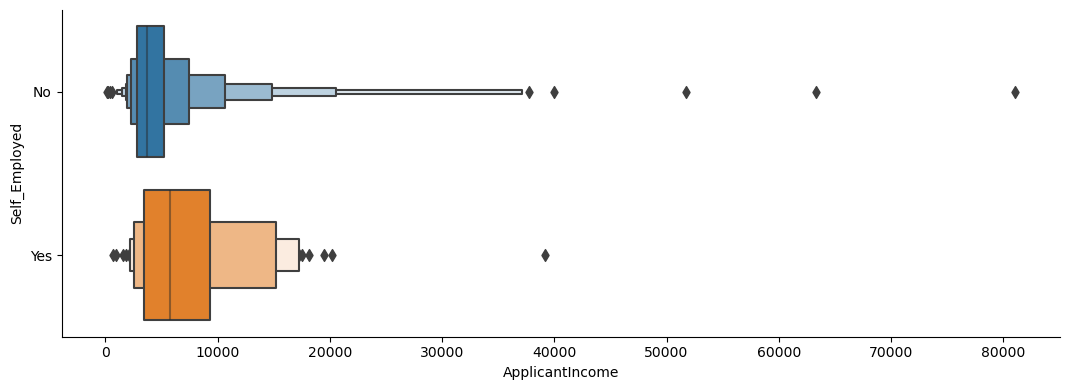

In [38]:
sns.catplot(x="ApplicantIncome", y="Self_Employed", data=df, kind="boxen",height=4, aspect=2.7)

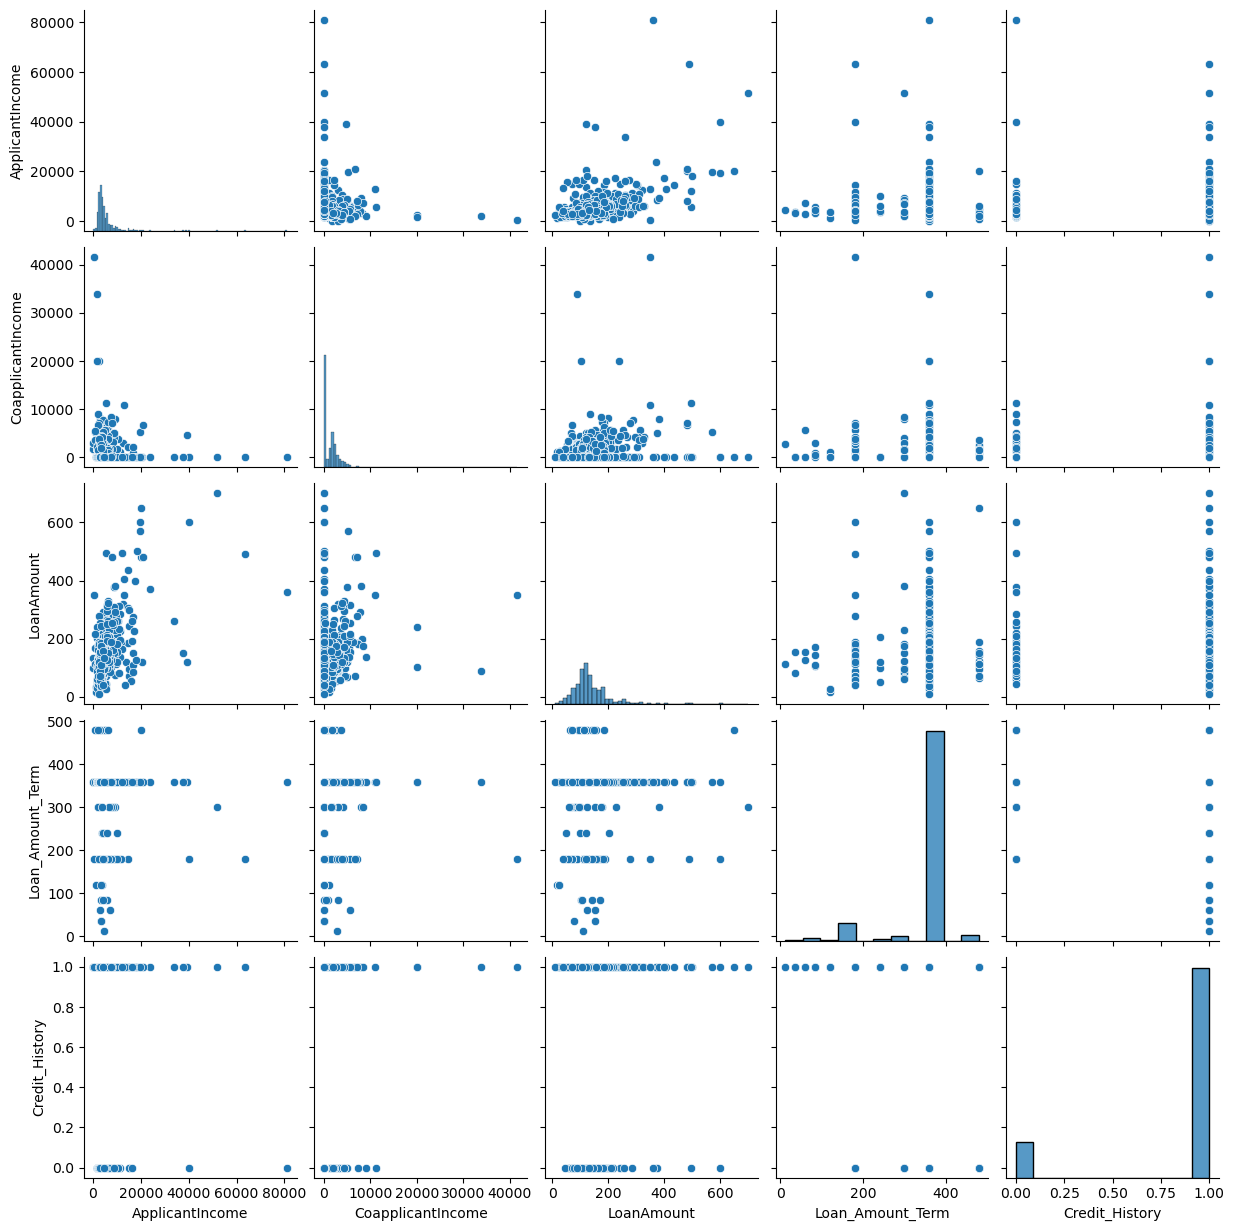

In [39]:
sns.pairplot(df)

<Axes: >

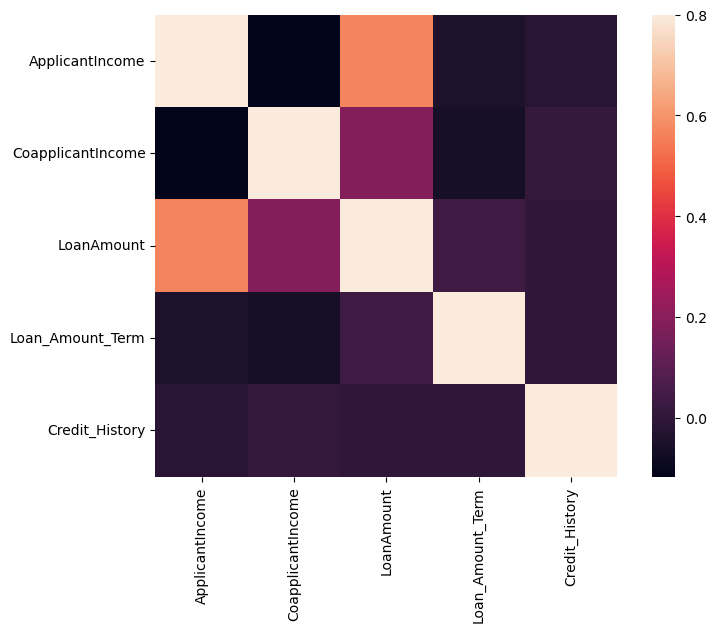

In [40]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

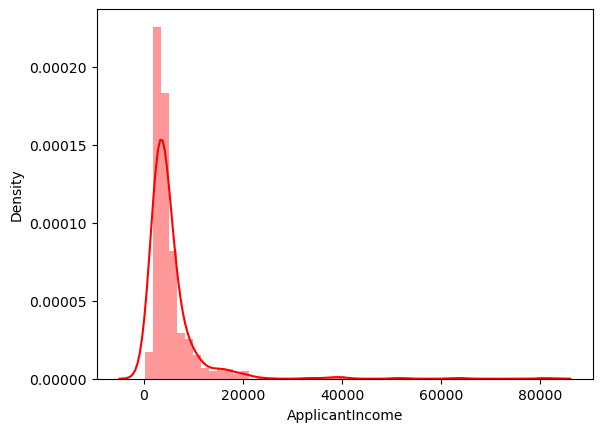

In [41]:
sns.distplot(df.ApplicantIncome,color="Red")

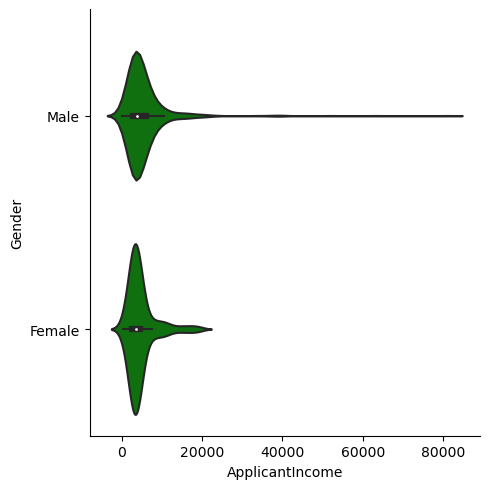

In [42]:
sns.catplot(x="ApplicantIncome", y="Gender",kind="violin",data=df,color="green")

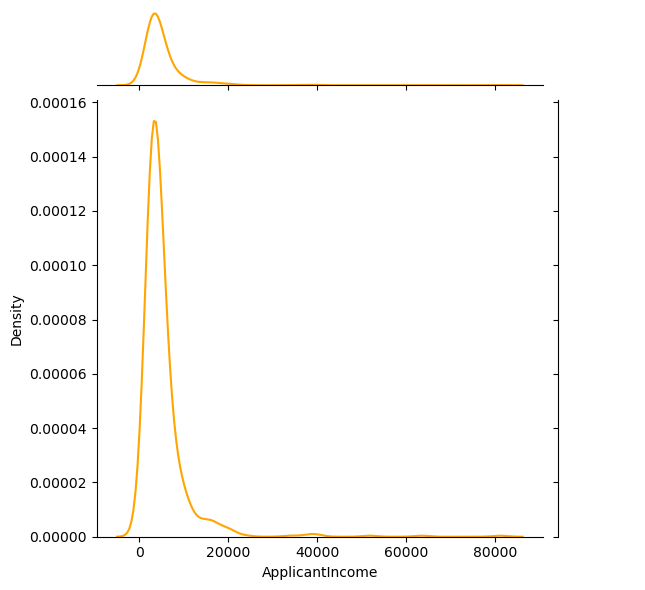

In [43]:
sns.jointplot(x="ApplicantIncome", data=df, kind="kde",color="orange");


<Axes: xlabel='Gender', ylabel='count'>

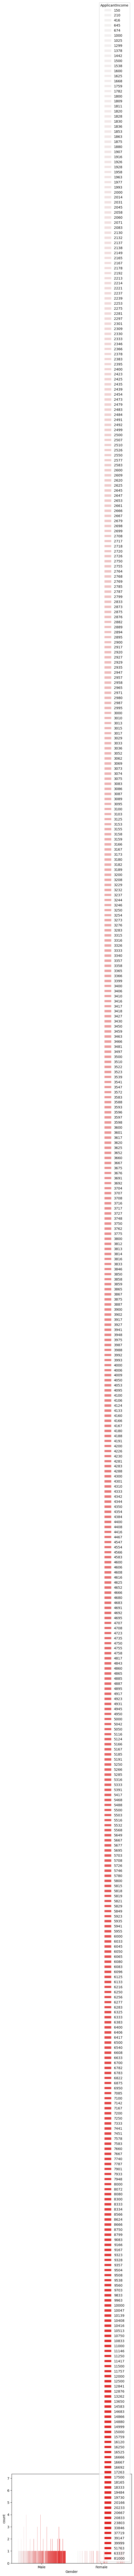

In [44]:
sns.countplot(x="Gender",hue="ApplicantIncome",data=df,color="red")

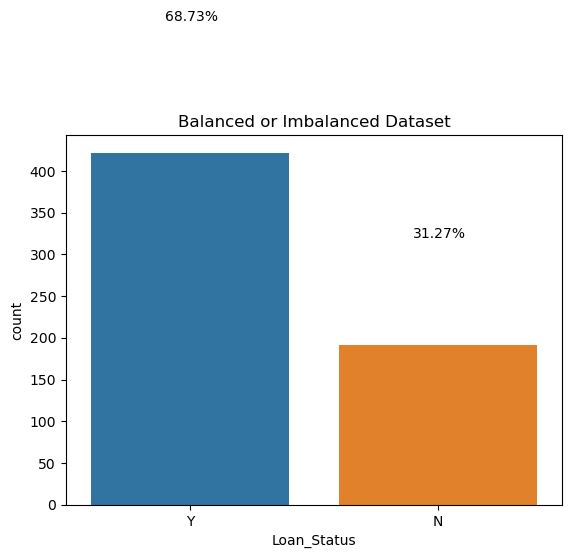

In [45]:
sns.countplot(x='Loan_Status',data=df)
plt.text(x = -0.1, y = 580, s = str(round(df.Loan_Status.value_counts()[0]/len(df)*100,2))+'%')
plt.text(x = 0.9, y = 320, s = str(round(df.Loan_Status.value_counts()[1]/len(df)*100,2))+'%')
plt.title("Balanced or Imbalanced Dataset")
plt.show()